1. Data Cleaning and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV

In [3]:
data = pd.read_csv('Algerian_forest_fires_cleaned.csv')
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values
data = data.dropna()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


In [5]:
features = ['Temperature', 'RH', 'Ws', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI']
target = 'FWI'

2. Data Visualization and Observations

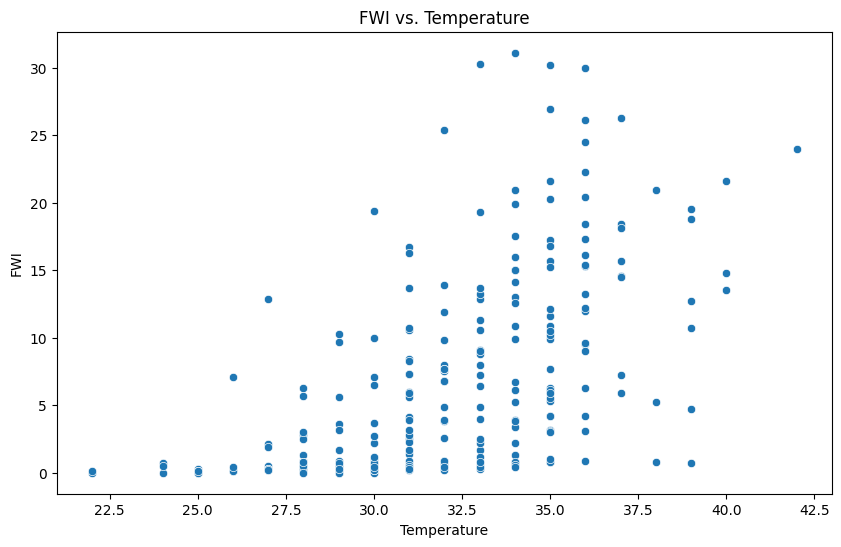

In [6]:
# Scatter plot of FWI vs. Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='FWI', data=data)
plt.title('FWI vs. Temperature')
plt.show()

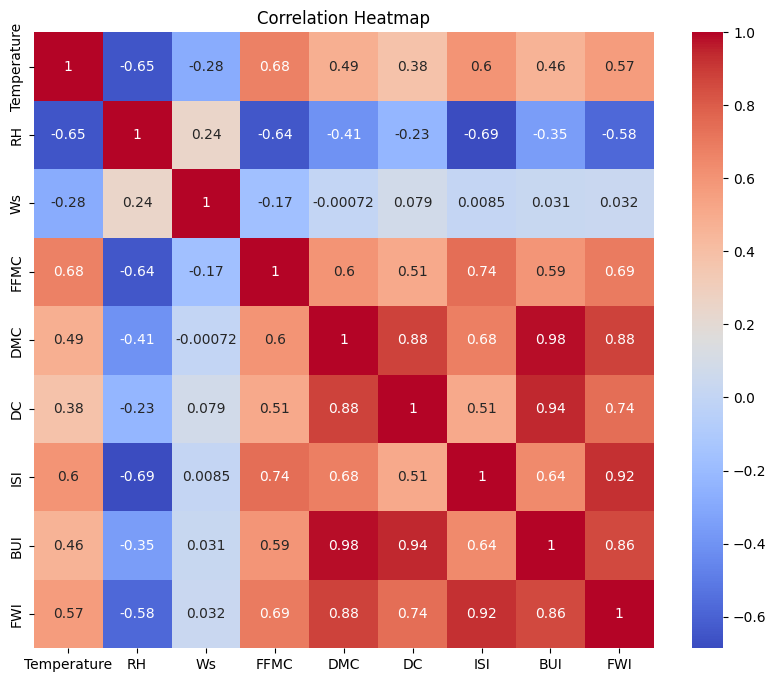

In [7]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data[features + [target]].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

3. Model Development and Analysis

In [8]:
# Split data into train and test sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multiple linear regression
mlr = LinearRegression()
mlr.fit(X_train, y_train)
mlr_train_score = mlr.score(X_train, y_train)
mlr_test_score = mlr.score(X_test, y_test)
print(f'Multiple Linear Regression - Train R^2: {mlr_train_score:.2f}, Test R^2: {mlr_test_score:.2f}')

Multiple Linear Regression - Train R^2: 0.97, Test R^2: 0.99


In [9]:
# Polynomial regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)
poly_train_score = poly_reg.score(X_poly, y_train)
poly_test_score = poly_reg.score(X_test_poly, y_test)
print(f'Polynomial Regression - Train R^2: {poly_train_score:.2f}, Test R^2: {poly_test_score:.2f}')

Polynomial Regression - Train R^2: 1.00, Test R^2: 0.97


In [10]:
# Regularized regression (Ridge and Lasso)
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
ridge_train_score = ridge.score(X_train, y_train)
ridge_test_score = ridge.score(X_test, y_test)
print(f'Ridge Regression - Train R^2: {ridge_train_score:.2f}, Test R^2: {ridge_test_score:.2f}')

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_train_score = lasso.score(X_train, y_train)
lasso_test_score = lasso.score(X_test, y_test)
print(f'Lasso Regression - Train R^2: {lasso_train_score:.2f}, Test R^2: {lasso_test_score:.2f}')

Ridge Regression - Train R^2: 0.97, Test R^2: 0.99
Lasso Regression - Train R^2: 0.97, Test R^2: 0.99


In [11]:
# Cross-validation and hyperparameter tuning for Ridge regression
ridge_params = {'alpha': np.logspace(-3, 2, 20)}
ridge_cv = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2')
ridge_cv.fit(X_train, y_train)
print(f'Best Ridge Alpha: {ridge_cv.best_params_["alpha"]:.2f}')
print(f'Best Ridge R^2: {ridge_cv.best_score_:.2f}')

Best Ridge Alpha: 100.00
Best Ridge R^2: 0.96


4. Model Evaluation and Testing

In [12]:
# Evaluate models on test set
y_pred_mlr = mlr.predict(X_test)
y_pred_poly = poly_reg.predict(X_test_poly)
y_pred_ridge = ridge_cv.best_estimator_.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

print('Multiple Linear Regression:')
print(f'R^2: {r2_score(y_test, y_pred_mlr):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_mlr)):.2f}')

print('\nPolynomial Regression:')
print(f'R^2: {r2_score(y_test, y_pred_poly):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_poly)):.2f}')

print('\nRidge Regression:')
print(f'R^2: {r2_score(y_test, y_pred_ridge):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge)):.2f}')

print('\nLasso Regression:')
print(f'R^2: {r2_score(y_test, y_pred_lasso):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lasso)):.2f}')

Multiple Linear Regression:
R^2: 0.99
RMSE: 0.59

Polynomial Regression:
R^2: 0.97
RMSE: 0.96

Ridge Regression:
R^2: 0.98
RMSE: 0.82

Lasso Regression:
R^2: 0.99
RMSE: 0.65
